# Import Dependencies

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


# Getting the Data

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Exploring the Data

In [3]:
# printing the categories we have to predict
print("Categories:", np.unique(train_labels))

Categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [4]:
print("Number of unique words:", len(np.unique(np.hstack(train_data))))

Number of unique words: 9982


In [5]:
length = [len(i) for i in train_data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 145.539857493
Standard Deviation: 146.0


In [6]:
# taking a look at a single training example
print("Label:", train_labels[0])

Label: 3


In [7]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
#show the actual words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3 ,"?") for i in train_data[1]])
print(decoded_review)

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


# Preparing the Data

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    #creating a numpy array 
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
#transform categories into numpy floats
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

In [11]:
# Converts integers to binary class matrix
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Building the Model

In [12]:
model = models.Sequential()

# Input-Layer
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))

# Hidden-Layers
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(55,activation="relu"))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dense(85,activation="relu"))
model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
model.add(layers.Dense(55,activation="relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(16,activation="relu"))

# Output-Layer
model.add(layers.Dense(46, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 55)                935       
_________________________________________________________________
dropout_2 (Dropout)          (None, 55)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 85)                4760      
_________________________________________________________________
dense_4 (Dense)              (None, 85)                7310      
_________________________________________________________________
dense_5 (Dense)              (None, 85)                7310      
__________

In [13]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"] 
)

In [14]:
# creating validation set
x_val = x_train[:4000]
partial_x_train = x_train[4000:]
y_val = y_train[:4000]
partial_y_train = y_train[4000:]

# Training the Model

In [15]:
history = model.fit(
partial_x_train, partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val,y_val)
)

Train on 4982 samples, validate on 4000 samples
Epoch 1/10
4982/4982 [==============================] - 2s 345us/step - loss: 0.0970 - acc: 0.9787 - val_loss: 0.0791 - val_acc: 0.9825
Epoch 2/10
4982/4982 [==============================] - 1s 152us/step - loss: 0.0720 - acc: 0.9839 - val_loss: 0.0632 - val_acc: 0.9848
Epoch 3/10
4982/4982 [==============================] - 1s 151us/step - loss: 0.0590 - acc: 0.9860 - val_loss: 0.0572 - val_acc: 0.9867
Epoch 4/10
4982/4982 [==============================] - 1s 151us/step - loss: 0.0530 - acc: 0.9876 - val_loss: 0.0550 - val_acc: 0.9881
Epoch 5/10
4982/4982 [==============================] - 1s 119us/step - loss: 0.0504 - acc: 0.9882 - val_loss: 0.0542 - val_acc: 0.9882
Epoch 6/10
4982/4982 [==============================] - 1s 116us/step - loss: 0.0478 - acc: 0.9887 - val_loss: 0.0530 - val_acc: 0.9882
Epoch 7/10
4982/4982 [==============================] - 1s 116us/step - loss: 0.0464 - acc: 0.9889 - val_loss: 0.0533 - val_acc: 0.9882


# Evaluation

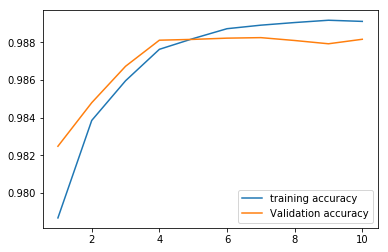

In [16]:
history_dict = history.history
loss_values = history_dict["loss"]

plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, label = "training accuracy")
plt.plot(epochs, val_acc_values, label ="Validation accuracy")
plt.legend()
plt.show()

In [17]:
print("Validation Accuracy:", np.mean(val_acc_values))

Validation Accuracy: 0.98709260993
